# 第二章 基础二维图
## 2.11 二维流场图


In [4]:
import pandas as pd
import numpy as np
from matplotlib.ticker import MultipleLocator
import matplotlib as mpl
mpl.rcParams["font.family"] = 'Arial'  #默认字体类型
mpl.rcParams["mathtext.fontset"] = 'cm' #数学文字字体
mpl.rcParams["contour.negative_linestyle"] = 'dashed'  #默认字体类型
import matplotlib.pyplot as plt
import os
# 新增
from netCDF4 import Dataset
from mpl_toolkits.axes_grid1.inset_locator import inset_axes

## 生成速度场数据

因为Nature等高水平期刊上的同类插图，数据难以获得。本节课的示例数据将用著名的物理现象的解析解直接生成流场数据。利用[Van der Pol oscillator](https://en.wikipedia.org/wiki/Van_der_Pol_oscillator)的解析解生成相应的速度场

### 基本参数介绍

* [streamplot](https://matplotlib.org/api/_as_gen/matplotlib.axes.Axes.streamplot.html#matplotlib.axes.Axes.streamplot)

```python
Axes.streamplot(axes, x, y, u, v, density=1, linewidth=None, color=None, cmap=None, norm=None, arrowsize=1, arrowstyle='-|>', minlength=0.1, transform=None, zorder=None, start_points=None, maxlength=4.0, integration_direction='both', *, data=None)
```

* [quiver](https://matplotlib.org/api/_as_gen/matplotlib.axes.Axes.quiver.html#matplotlib.axes.Axes.quiver)

```python
quiver([X, Y], U, V, [C], **kw)
```

In [2]:
def genVelocity(m,x,y):
    U,V=m*(x - x**3/3 - y), x/m
    return U,V

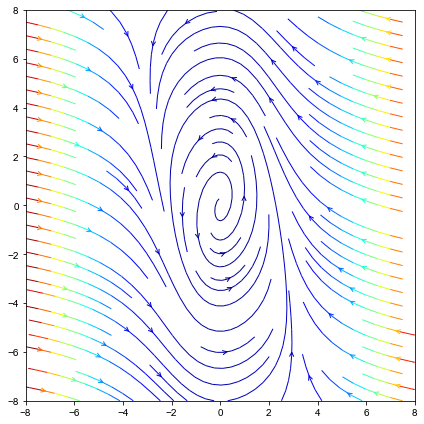

In [123]:
l = 8.0 #x，y轴尺度的半宽度
n = 300 # 采样点个数
mu = 0.5
x=np.linspace(-l,l,n)
y=np.linspace(-l,l,n)
X,Y=np.meshgrid(x,y)
U,V=genVelocity(mu,X,Y)
vel=(U**2 + V**2)**0.5
lw=4*vel/np.max(vel)

fig=plt.figure(figsize=(6,6))
ax=plt.gca()
stream=ax.streamplot(X,Y,U,V,
              arrowsize=1,
              arrowstyle='->',
              density=(1,1),
              color=vel, #'xkcd:lightblue',
              linewidth=1,
              cmap='jet'
             )
# plt.colorbar(stream.lines)

# savefig
plt.tight_layout()
plt.savefig('../../figures/Chapter2/Lecture2_11_streamplot.pdf')

plt.show()

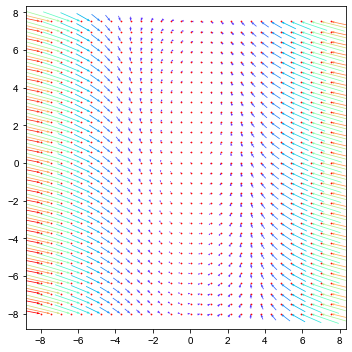

In [130]:

fig=plt.figure(figsize=(5,5))
ax=plt.gca()
interval=10
skip=(slice(None, None,interval),slice(None, None, interval)) # slice(start, stop, step)
q=ax.quiver(X[skip],Y[skip],U[skip],V[skip],
          vel[skip],
          units='xy',angles='xy',scale=25,pivot='tip',
          color='k',
          cmap='rainbow'
         )
# ax.quiverkey(q, X=0.3, Y=1.05, U=100,label='Quiver key, length = 10', labelpos='E',coordinates='axes',clip_on=False)
ax.scatter(X[skip],Y[skip],color='r',s=0.5)
# savefig
plt.tight_layout()
plt.savefig('../../figures/Chapter2/Lecture2_11_quiver.pdf')

plt.show()

## 案例
全球的风速场，数据来自：[copernicus 2020年1月1日0时0分 100m of wind](https://cds.climate.copernicus.eu/cdsapp#!/dataset/reanalysis-era5-single-levels?tab=form)

### 数据来源

[![copernicus](https://cds.climate.copernicus.eu/sites/default/files/cdsapp/copernicus-logo.png)](https://cds.climate.copernicus.eu/cdsapp#!/dataset/reanalysis-era5-single-levels?tab=form)

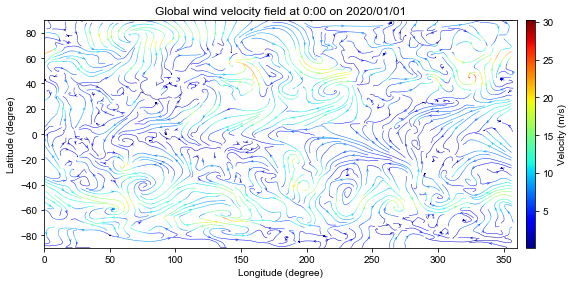

In [176]:
# 1. 读取nc
data=Dataset('data/streamplot/globalWind.nc')
# print(data.variables) #查看变量
lon=data.variables['longitude'][:]
lat=data.variables['latitude'][:]
u=data.variables['u100'][:]
v=data.variables['v100'][:]
U=u.reshape((u.shape[1],u.shape[2]))
V=v.reshape((v.shape[1],v.shape[2]))
vel=(U**2 + V**2)**0.5
# 构建网格
X, Y = np.meshgrid(lon, lat)
# 绘制等值线
fig=plt.figure(figsize=(8,4))
ax=plt.gca()
# ax.streamplot(X,Y,u,v)
interval=10
skip=(slice(None, None,interval),slice(None, None, interval)) # slice(start, stop, step)
# q=ax.quiver(X[skip],Y[skip],U[skip],V[skip],
#           vel[skip],
#           units='xy',angles='xy',scale=2,pivot='tip',
#           color='k',
#           cmap='rainbow'
#          )

stream=ax.streamplot(X[skip],Y[skip],U[skip],V[skip],
              arrowsize=0.5,
              arrowstyle='->',
              density=(3,3),
              color=vel[skip], #'xkcd:lightblue',
              linewidth=0.5,
              cmap='jet'
             )
# 设置等值文字标注
ax.set_xlabel('Longitude (degree)')
ax.set_ylabel('Latitude (degree)')
ax.set_title('Global wind velocity field at 0:00 on 2020/01/01')
ax.set_xlim(np.min(lon),np.max(lon))
ax.set_ylim(np.min(lat),np.max(lat))
# colorbar
caxis = inset_axes(ax, width="100%", height="100%", loc='lower left',
                   bbox_to_anchor=(1.02, 0., 0.02, 1), bbox_transform=ax.transAxes, borderpad=0,)
cb = plt.colorbar(stream.lines, cax = caxis,format='%.0f')  
cb.set_label('Velocity (m/s)')

whspace=0.06
plt.subplots_adjust(wspace=whspace,hspace=whspace,bottom=0.13,left=0.08,right=0.9,top=0.92)
# savefig
plt.savefig('../../figures/Chapter2/Lecture2_11_example1.pdf')
plt.show()



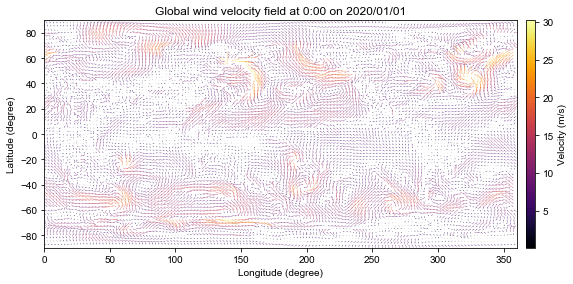

In [181]:
# 1. 读取nc
data=Dataset('data/streamplot/globalWind.nc')
# print(data.variables) #查看变量
lon=data.variables['longitude'][:]
lat=data.variables['latitude'][:]
u=data.variables['u100'][:]
v=data.variables['v100'][:]
U=u.reshape((u.shape[1],u.shape[2]))
V=v.reshape((v.shape[1],v.shape[2]))
vel=(U**2 + V**2)**0.5
# 构建网格
X, Y = np.meshgrid(lon, lat)
# 绘制等值线
fig=plt.figure(figsize=(8,4))
ax=plt.gca()
# ax.streamplot(X,Y,u,v)
interval=10
skip=(slice(None, None,interval),slice(None, None, interval)) # slice(start, stop, step)
q=ax.quiver(X[skip],Y[skip],U[skip],V[skip],
          vel[skip],
          units='xy',angles='xy',scale=3,pivot='tip',
          color='k',
          cmap='inferno',
          width=0.2
         )
# 设置等值文字标注
ax.set_xlabel('Longitude (degree)')
ax.set_ylabel('Latitude (degree)')
ax.set_title('Global wind velocity field at 0:00 on 2020/01/01')
ax.set_xlim(np.min(lon),np.max(lon))
ax.set_ylim(np.min(lat),np.max(lat))
# colorbar
caxis = inset_axes(ax, width="100%", height="100%", loc='lower left',
                   bbox_to_anchor=(1.02, 0., 0.02, 1), bbox_transform=ax.transAxes, borderpad=0,)
cb = plt.colorbar(q, cax = caxis,format='%.0f')  
cb.set_label('Velocity (m/s)')

whspace=0.06
plt.subplots_adjust(wspace=whspace,hspace=whspace,bottom=0.13,left=0.08,right=0.9,top=0.92)
# savefig
plt.savefig('../../figures/Chapter2/Lecture2_11_example2.pdf')
plt.show()


